In [110]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
from matplotlib.colors import LogNorm
import os
from astropy.io import ascii
cwd = os.getcwd()
os.chdir(cwd + '/..')
from gcex.utils.io import cosmic_read_helper
from gcex.utils.getlcs import get_lcs
os.chdir(cwd)

# Timing

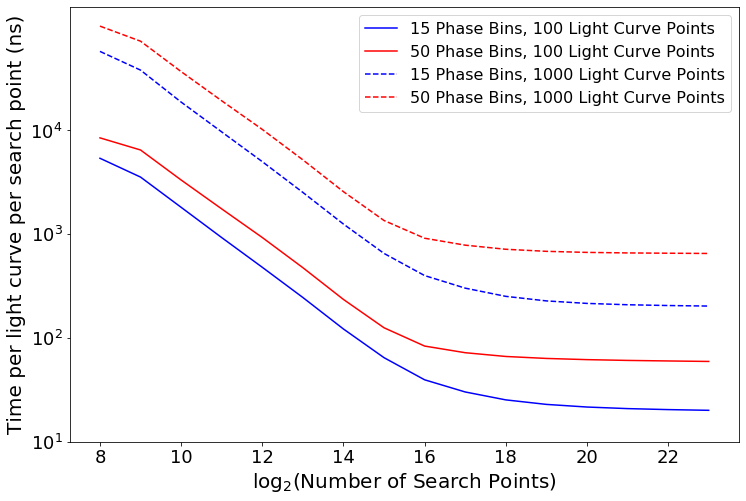

In [44]:
fig, ax1 = plt.subplots(1, 1, sharex=True)
fig.set_size_inches(12, 8)
plt.subplots_adjust(hspace=0.0)
num_pdots = 256

tick_fontsize = 18
label_fontsize = 20

# get data
phase_bin_list = [15, 50]
num_points = [100, 1000]
colors = ['blue', 'red']
lss = ['solid', 'dashed']

for nps, ls in zip(num_points, lss):
    for pb, color in zip(phase_bin_list, colors): 
        num_freqs, total, per = np.load('data/timing_results_{}_{}.npy'.format(pb, nps))
        #ax1.plot(np.log2(num_freqs*num_pdots), np.log10(total))
        label = '{} Phase Bins, {} Light Curve Points'.format(pb, nps)
        ax1.plot(np.log2(num_freqs*num_pdots), np.log10(per), label=label, color=color, ls=ls)
        
        #if nps == 100 and pb == 50:
        #    num_freqs, total, per = np.load('data/pdot_check_timing_results_{}_{}.npy'.format(pb, nps))
        #    #ax1.plot(np.log2(num_freqs*num_pdots), np.log10(total))
        #    label = '{} Phase Bins, {} Light Curve Points'.format(pb, nps)
        #    ax1.plot(np.log2(num_freqs*num_pdots), np.log10(per), label=label, color='k', ls=ls)
    
for tick in ax1.xaxis.get_major_ticks():
    tick.label.set_fontsize(tick_fontsize) 
    
time_ticks = [-8, -7, -6, -5]
time_tick_labels = [r'$10^{1}$', r'$10^{2}$', r'$10^{3}$', r'$10^{4}$']
ax1.set_yticks(time_ticks)
ax1.set_yticklabels(time_tick_labels, fontsize=tick_fontsize)
ax1.set_ylabel('Time per light curve per search point (ns)', fontsize=label_fontsize)
ax1.set_xlabel(r"log$_2$(Number of Search Points)", fontsize=label_fontsize)
ax1.legend(loc='upper right', prop={'size':16})
fig.savefig("figures/timing_example.pdf", dpi=200)

# Light Curve Example

In [80]:
input_dict = {
                 'm1': 0.07231938,
                 'm2': 0.7526806,
                 'd': 1100854.05444269,
                 'period': 0.0064763,
                 'Pdot': 4.83708600e-10,
                 'incl': 100.,
                 'sbratio': 0.5
             }
input_dict['q'] = 10.40773013
input_dict['m_tot'] = 0.82499998

input_dict = {key: np.array([input_dict[key]]) for key in input_dict}
lcs = get_lcs(input_dict, min_pts=299, max_pts=301, verbose=25, mean_dt=3, sig_t=2)

0


<Figure size 432x288 with 0 Axes>

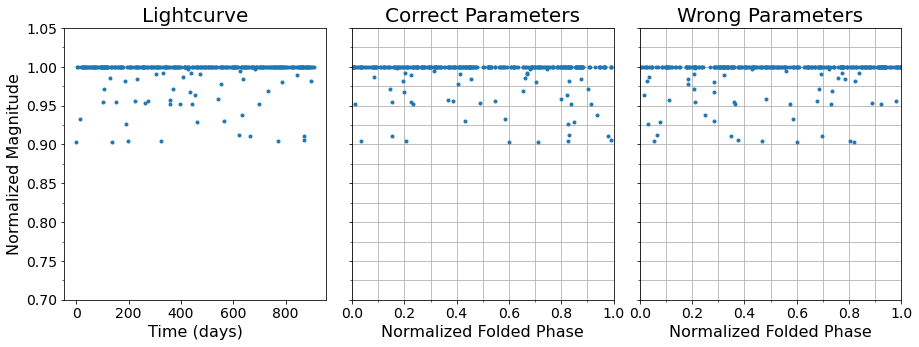

In [82]:
titles = ['Lightcurve', 'Correct Parameters', 'Wrong Parameters']

fig, ax = plt.subplots(1, 3, sharey=True)
plt.subplots_adjust(wspace=0.1)
fig.set_size_inches(15.0, 5.0)
ax = ax.ravel()

period = input_dict['period'][0]
frequency = 1./period
pdot = input_dict['Pdot'][0]

wrong_period = period
wrong_pdot = 0.0
wrong_frequency = 1/wrong_period

t = lcs[0][:,0] + 0.6*period
mags = lcs[0][:,1]

fold = np.fmod(t-0.5*pdot*frequency*(t*t), period)*frequency
wrong_fold = np.fmod(t-0.5*wrong_pdot*wrong_frequency*(t*t), wrong_period)*wrong_frequency

ax[0].plot(t, mags, '.')
ax[1].plot(fold, mags, '.')
ax[2].plot(wrong_fold, mags, '.')

limits = (0.7, 1.05)
ax[0].set_ylim(*limits)

for (ax_i, title) in zip(ax, titles):
    ax_i.set_title(title, fontsize=20)
    ax_i.tick_params('both', labelsize=14)
    
#ax[1].set_xticks([0.0, 0.2, 0.4, 0.6, 0.8])
for ax_i in ax[1:]:
    ax_i.set_xlim(0.0, 1.0)
    ax_i.xaxis.set_minor_locator(AutoMinorLocator(2))
    ax_i.yaxis.set_minor_locator(AutoMinorLocator(2))
    ax_i.grid(True, which='both')
    ax_i.set_xlabel('Normalized Folded Phase', fontsize=16)
    
ax[0].set_xlabel('Time (days)', fontsize=16)
ax[0].set_ylabel('Normalized Magnitude', fontsize=16)
fig.savefig('figures/light_curve_example.pdf', dpi=200)

# Populations

In [90]:
fp = '../input/gx_save_lambda_var_alpha_025.csv'
params = cosmic_read_helper(fp, x_sun=0.0, y_sun=0.0, z_sun=0.0, use_gr=False)
print(params.keys())

dict_keys(['f_gw[Hz]', 'f_dot_total [yr^(-2)]', 'm1 [msun]', 'm2[msun]', 'xGx[kpc]', 'yGx[kpc]', 'zGx[kpc]', 'm1', 'm2', 'q', 'm_tot', 'd', 'period', 'Pdot', 'incl', 'sbratio'])


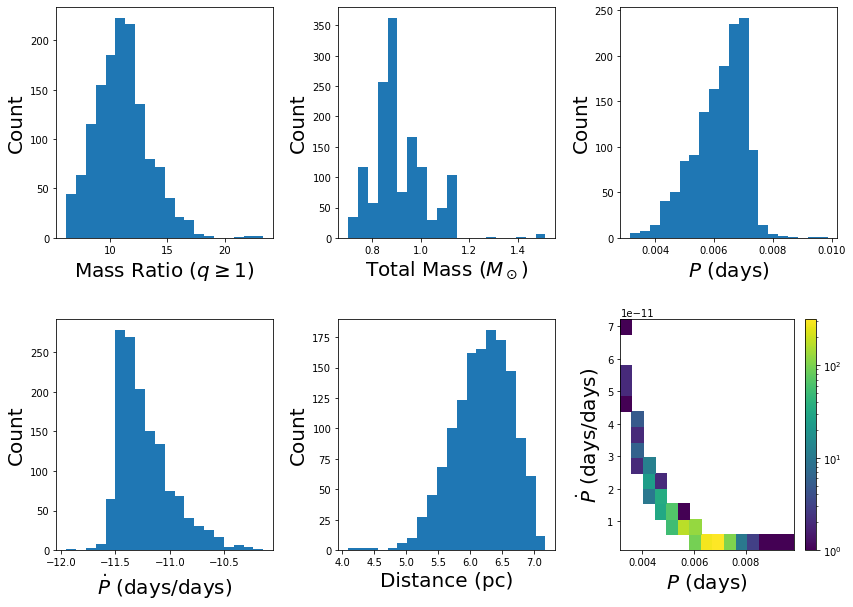

In [123]:
plt.close()

# TODO separate into populations ??
show_keys = ['q', 'm_tot', 'period', 'Pdot', 'd']
labels = [r'Mass Ratio ($q\geq1$)', r'Total Mass ($M_\odot$)', r'$P$ (days)', r'$\dot{P}$ (days/days)', 'Distance (pc)'] # check parsec
fig, ax = plt.subplots(2,3)
plt.subplots_adjust(hspace=0.35, wspace=0.3, right=0.9)
ax = ax.ravel()
fig.set_size_inches(14,10)

label_fontsize = 20

for axis, key, label in zip(ax, show_keys, labels):
    input_val = np.log10(params[key]) if key in ['d', 'Pdot'] else params[key]
    axis.hist(input_val, bins=20)
    axis.set_xlabel(label, fontsize=label_fontsize)
    
for axis in ax[:-1]:
    axis.set_ylabel('Count', fontsize=label_fontsize)
    
h = ax[-1].hist2d(params['period'], params['Pdot'], bins=15, norm=LogNorm())
fig.colorbar(h[3])
ax[-1].set_ylabel(r'$\dot{P}$ (days/days)', fontsize=label_fontsize)
ax[-1].set_xlabel(r'$P$ (days)', fontsize=label_fontsize)

fig.savefig('figures/population_parameters.pdf')